In [1]:
# current date, for retrieving data from proper location.
year = "2024"
month = "March"
day = "14"

## Imports and initialization

In [2]:
%config Completer.use_jedi = False
import numpy as np 
from scipy.optimize import curve_fit
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
import scipy.signal
import matplotlib.ticker as ticker
from matplotlib import gridspec
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
warnings.filterwarnings("ignore", category=RuntimeWarning)
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle

from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
color2 = 'tab:blue'
color1 = 'tab:green'
markersize = 10
capsize = 5
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

In [3]:
import sys
sys.path.append("../..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
import Analysis_Python_Files.CollisionalAnalysis as lac
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

# Today's Work

In [4]:
atomlocs = [2, 2, 3, 3, 1]

In [5]:
loadNone = tao.condition([0,0,0], [0,1,2], [0,0,0])

loadOne = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 1, name = 'Load any one tweezer')
# tao.condition([0 = 1st pic, 1 = 2nd pic],

loadTwo = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 2, name = 'Load any two tweezers')
loadThree = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 3, name = 'Load all three tweezers')
loadOuter = tao.condition([0,0,0], [0,1,2], [1,0,1], numRequired = 2, name = 'Load outer tweezers')

finCenter = tao.condition([1],[1],[1], markerWhichPicList=[1], markerLocList=[1])
# 
# loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo], [loadThree]],[finCenter for _ in range(3)]);
loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo]],[finCenter for _ in range(2)]);
loadOneOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne]],[finCenter for _ in range(1)]);
loadTwoOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadTwo]],[finCenter for _ in range(1)]);
loadThreeOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadThree]],[finCenter for _ in range(1)]);
loadOuterOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOuter]],[finCenter for _ in range(1)]);

### File 7 (2_0_rate_measurement):  

Number of Pictures: 1500; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 75;	Exp File Version: 4;
Experiment started at (H:M:S) 10:34:52: on (Y-M-D) 2024-3-14, And ended at 10:40:39: on 2024-3-14
Experiment Notes:  



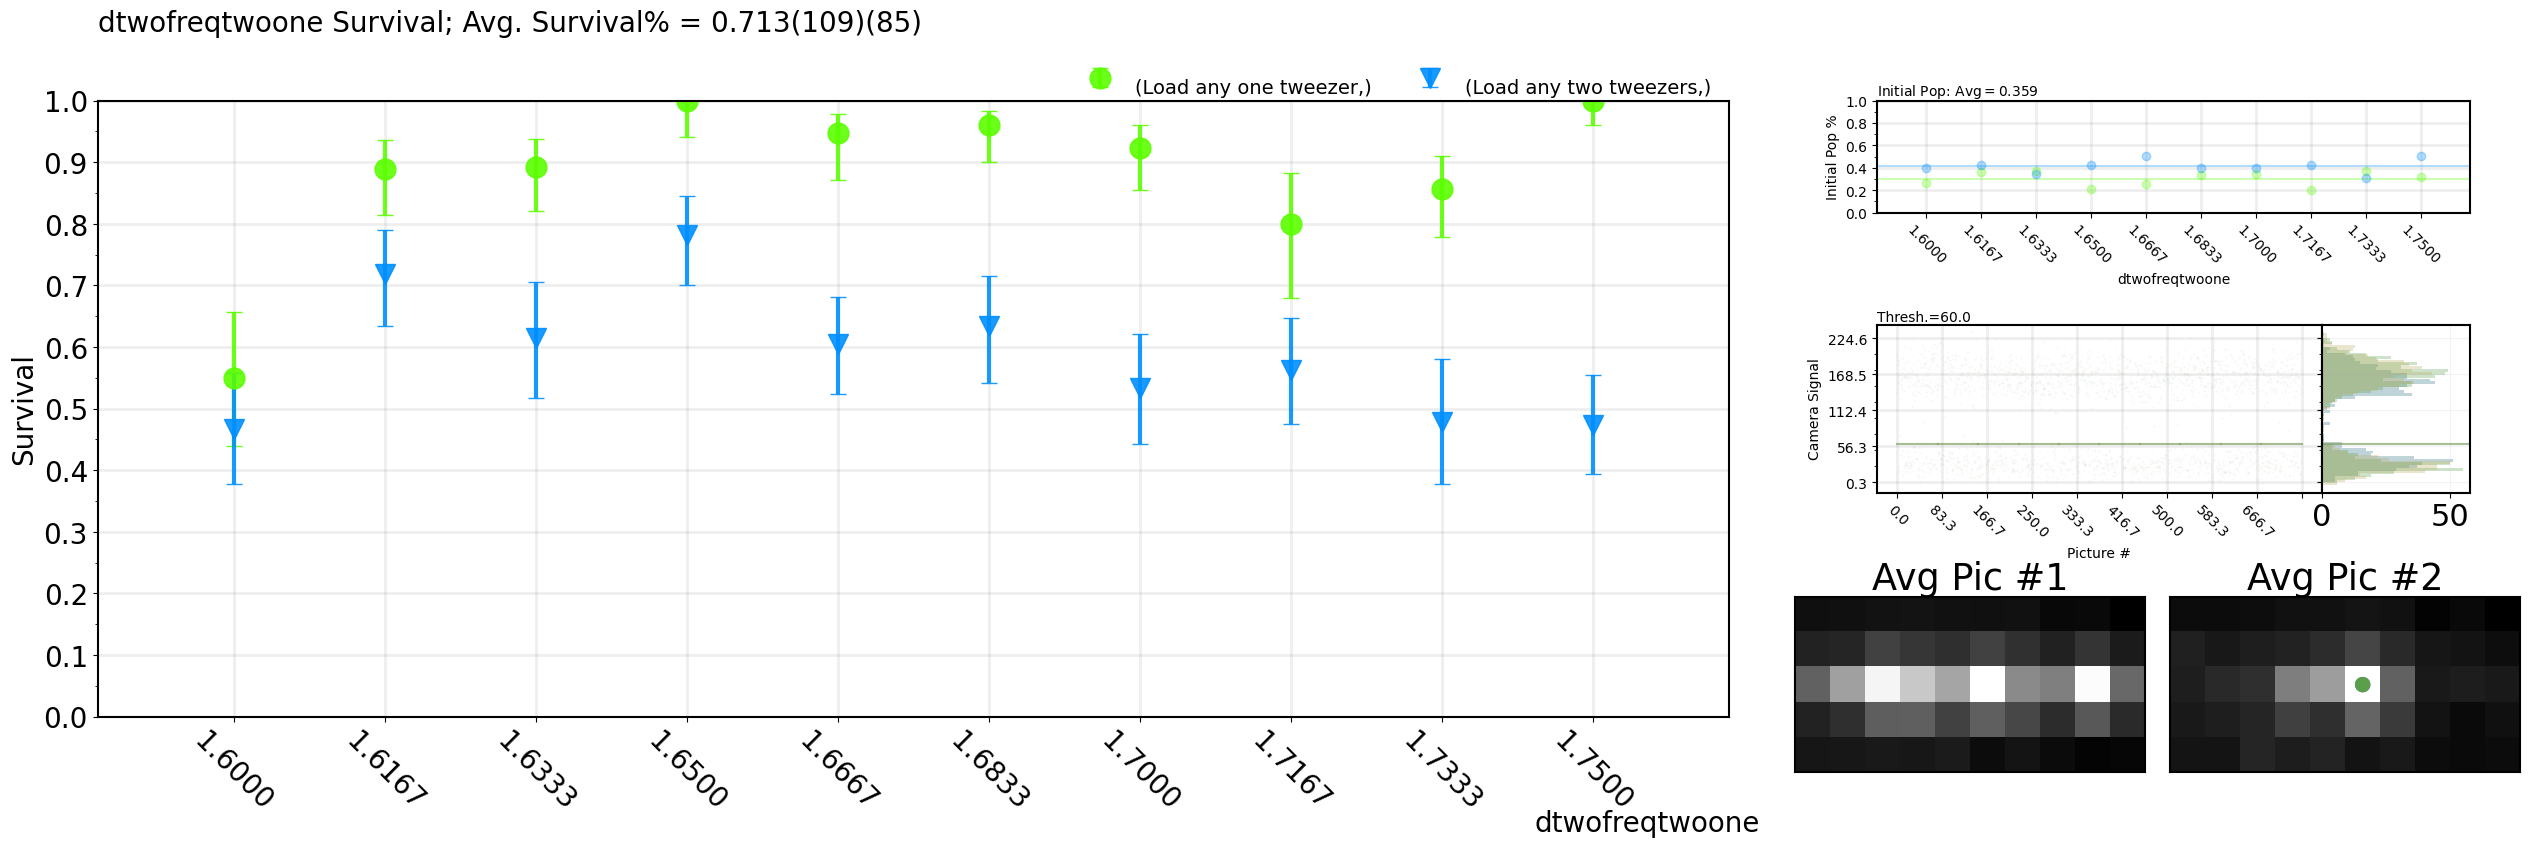

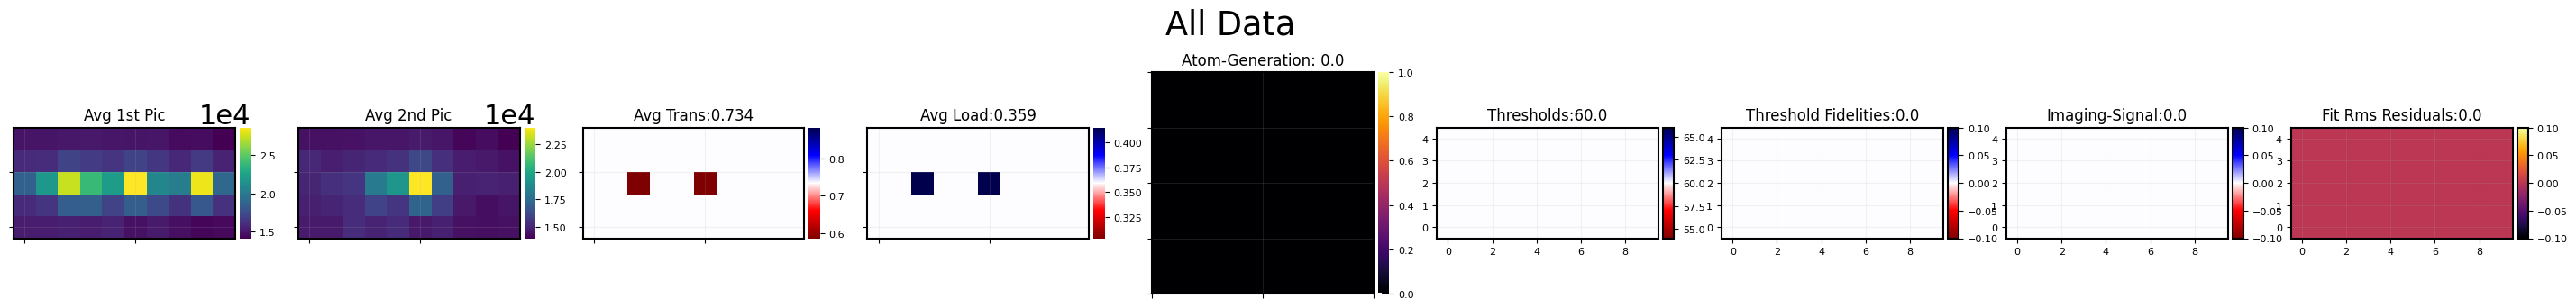

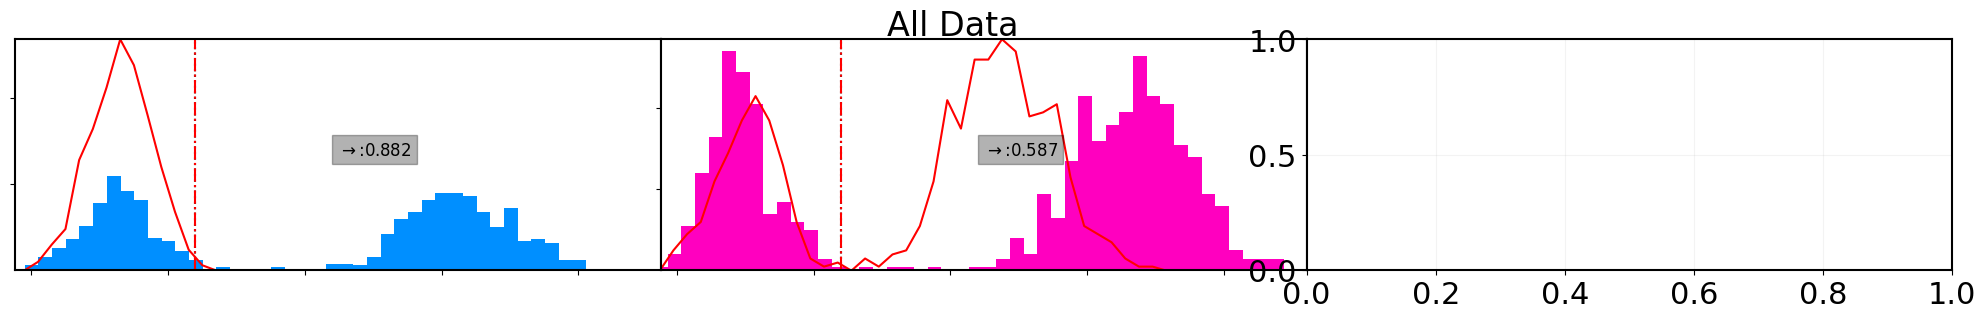

In [182]:
thresh = 60
mp.Transfer(7, loadOpt, plotIndvHists = True, plotAvg=False, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = thresh)]);

### File 23 (2_0_rate_measurement):  

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 15:51:31: on (Y-M-D) 2024-3-14, And ended at 15:57:31: on 2024-3-14
Experiment Notes:  



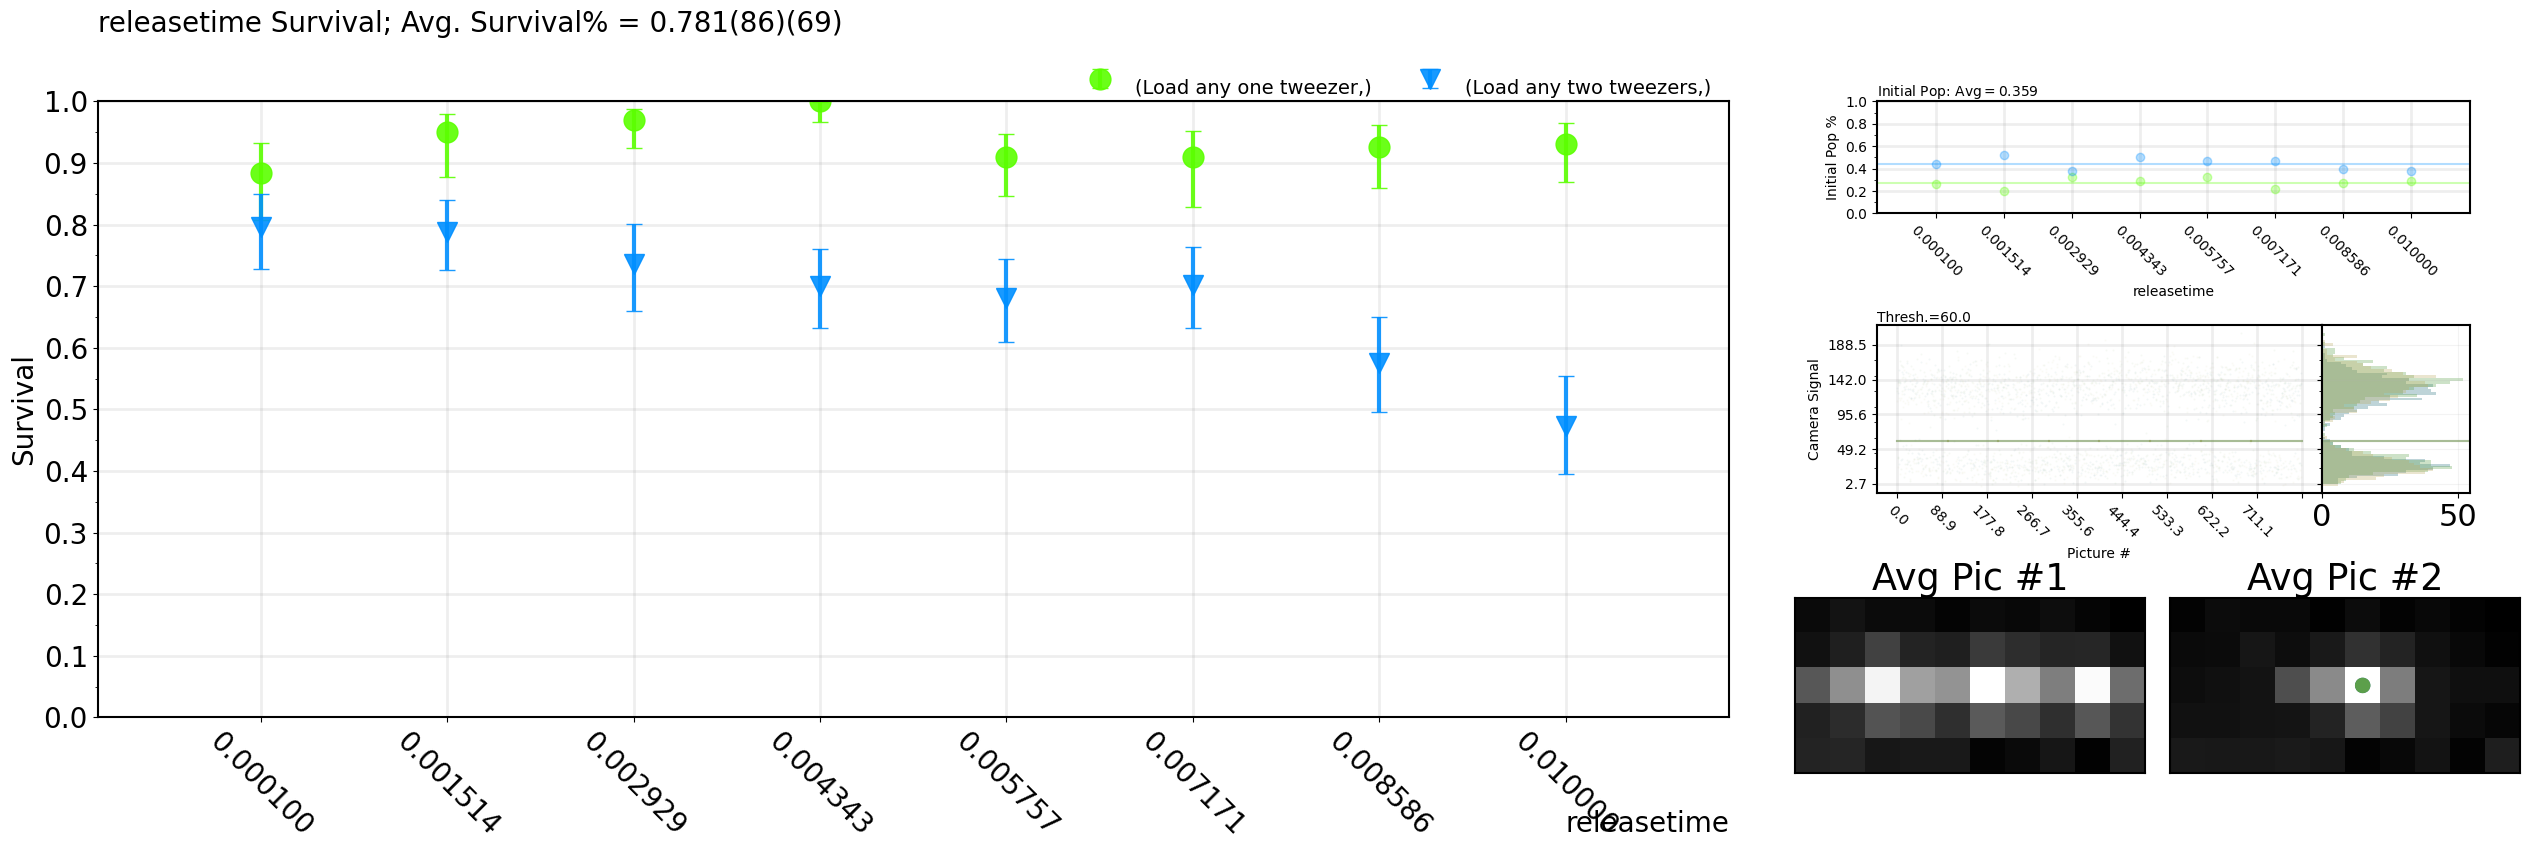

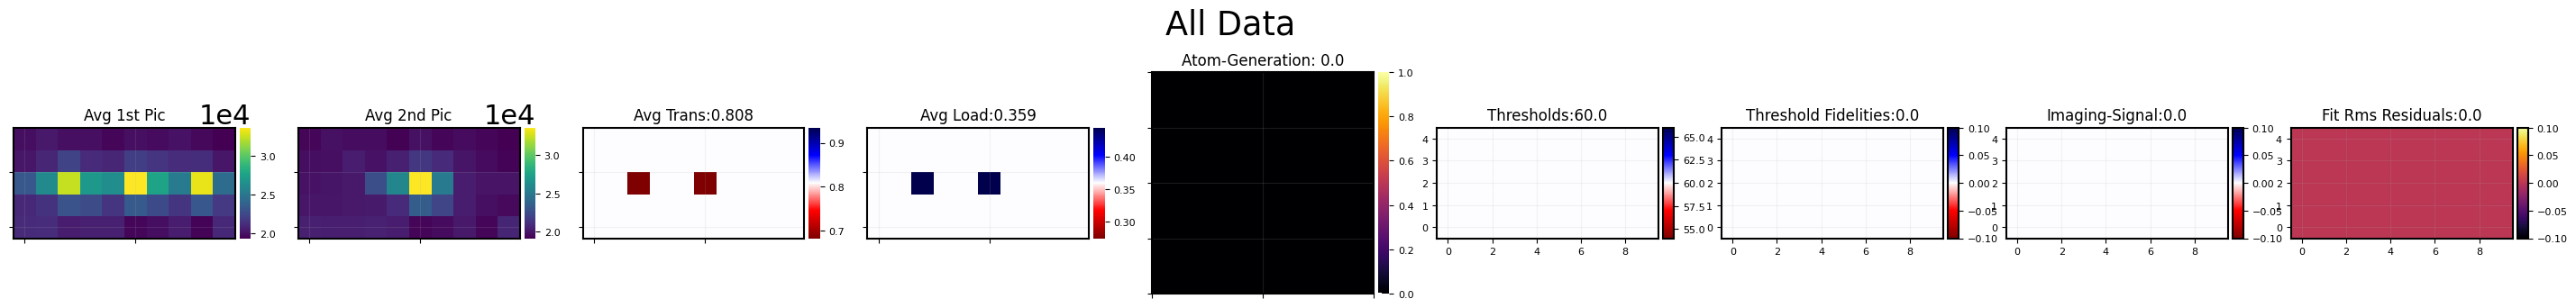

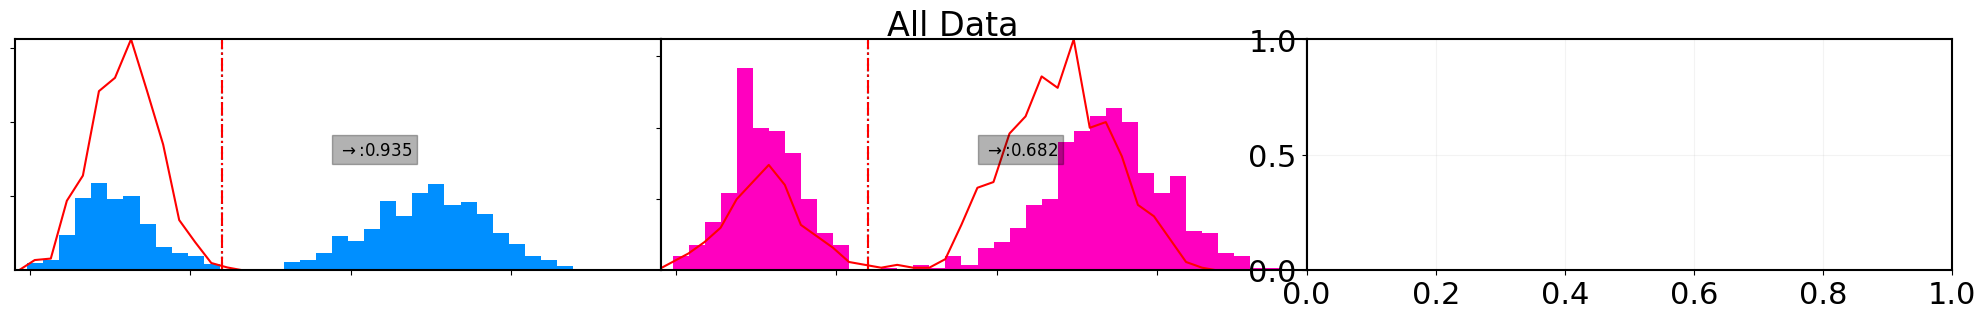

In [199]:
thresh = 60
mp.Transfer(23, loadOpt, plotIndvHists = True, plotAvg=False, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = thresh)]);

In [167]:
def VCOtoDetuning_intrap(V):
    resV = 1.56
    delta = (V-resV)*168
    # print(delta,'MHz')
    return delta

def VCOtoDetuning_freespace(V):
    resV = 1.47
    delta = (V-resV)*168
    # print(delta,'MHz')
    return delta

In [159]:
(1.6-1.56)*168

6.720000000000006

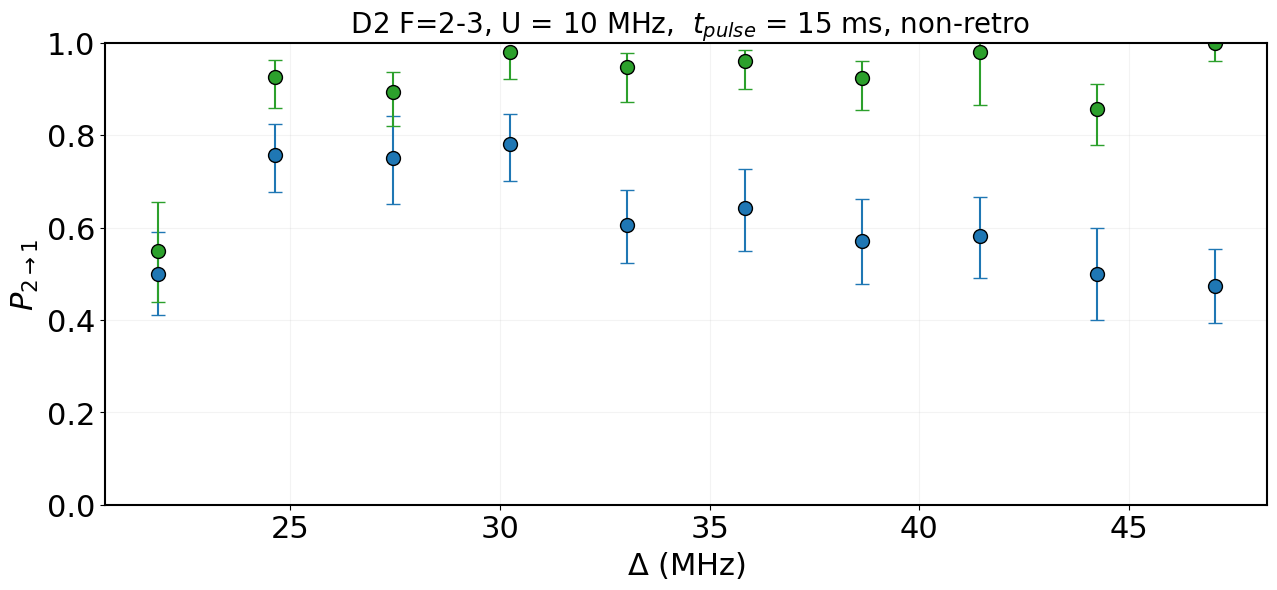

In [168]:
threshold = 50
fileID = 7

dataset1 = ta.standardTransferAnalysis(fileID, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
avgTferData1[2] = .75

color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]



dataset2 = ta.standardTransferAnalysis(fileID, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 75)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
avgTferData2[3] = .98
avgTferData2[7] = .98

color2 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

converted_mhz_values10 = []
for i in key1:
    # delta = VCOtoDetuning_intrap(i)
    delta = VCOtoDetuning_freespace(i)

    converted_mhz_values10.append(delta)

    
fig, ax = plt.subplots(figsize=(15, 6))
ax.errorbar(converted_mhz_values10,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5)
ax.errorbar(converted_mhz_values10,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 10,markerfacecolor=color2,markeredgecolor='k',capsize=5)

ax.grid(which='minor', alpha=1)
# plt.legend(loc='upper left',fontsize=15)
plt.ylim(0,1)
plt.ylabel(r'$P_{2\rightarrow 1}$')
plt.xlabel(r'$ \Delta \ \mathrm{(MHz)}$')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 
plt.title(r' D2 F=2-3, U = 10 MHz,  $t_{pulse}$ = 15 ms, non-retro' ,fontsize=20);

## V = 1.62

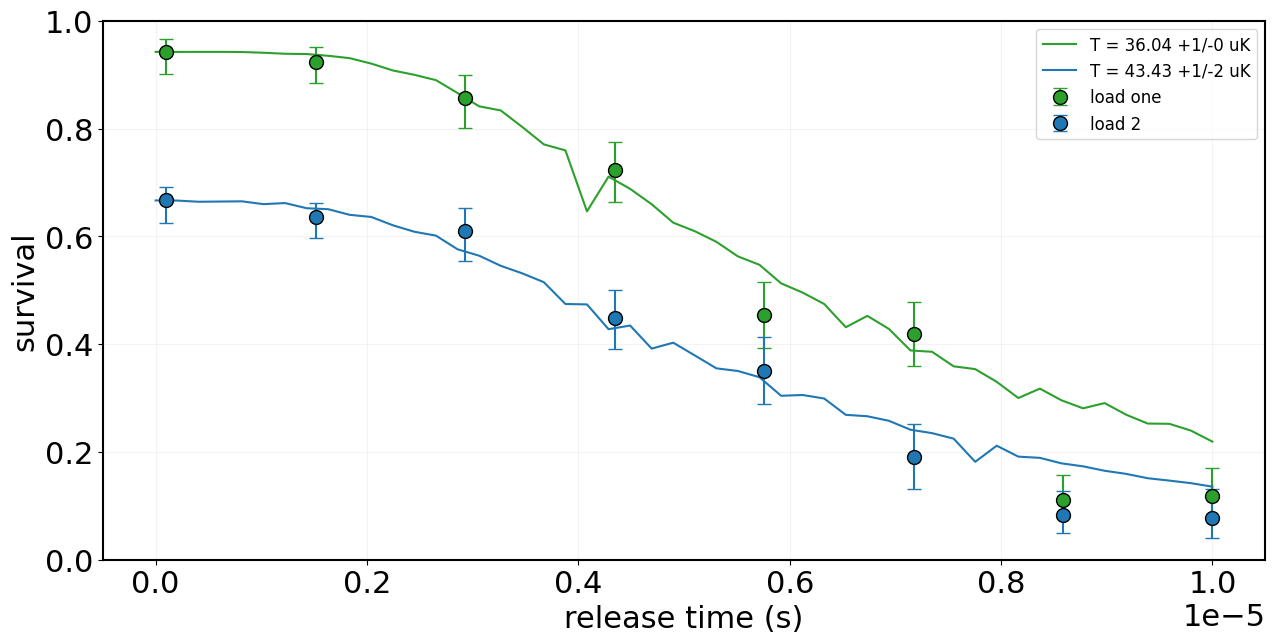

In [210]:
color1 = 'tab:green'
color2= 'tab:blue'
fileId1 = 28
fileId2 = fileId1 
threshold = 65
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
# x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(fileId2, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 30e-6
temp_guess2 = 30e-6
trap_depth = .5e-3
# load_two_y1[0]=.6
# load_two_y1[1]=.6

# load_two_y1[0]=.75
# load_one_y1[5]=.4

# load_one_y1[3]=.4
# load_one_y1[4]=.2
# load_one_y2[0]=.95
# load_one_y2[1]=.85
fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize,label = 'load one')

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1)

ax.errorbar(x_data1*1e-3,load_two_y1, yerr=load_two_err1,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'load 2')

ah.releaseRecaptureTemp(x_data1,load_two_y1,load_two_err1,tempGuess=temp_guess2,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

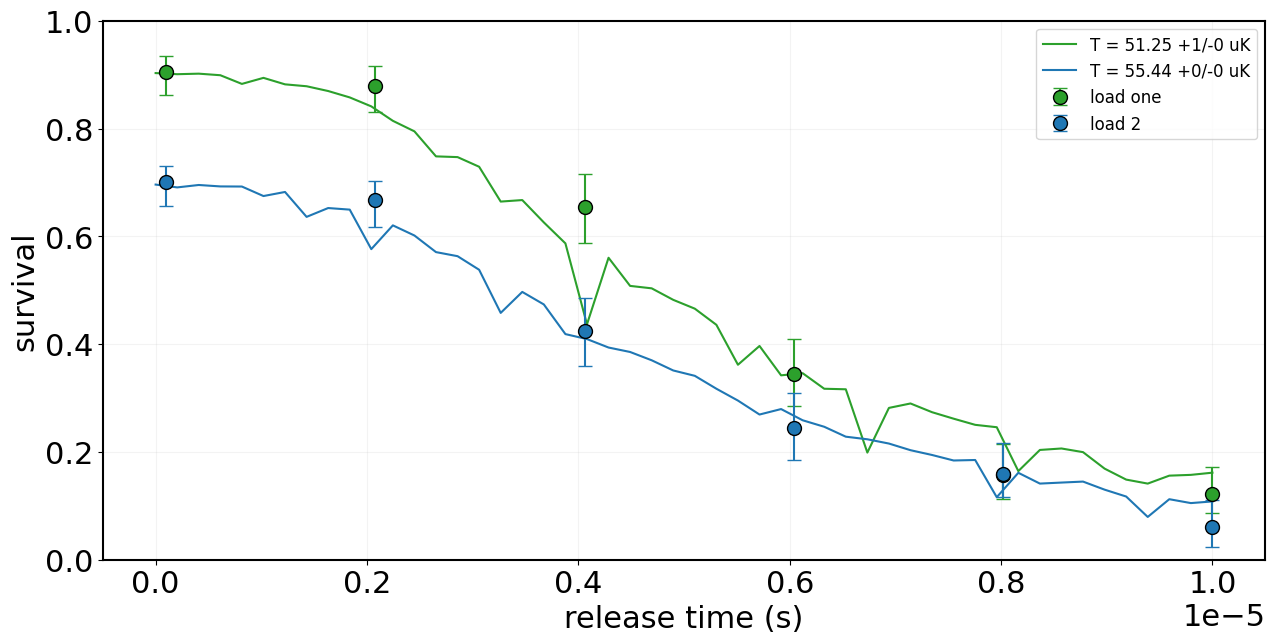

In [224]:
color1 = 'tab:green'
color2= 'tab:blue'
fileId1 = 36
fileId2 = fileId1 
threshold = 65
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
# x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(fileId2, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 30e-6
temp_guess2 = 30e-6
trap_depth = .5e-3
load_two_y1[0]=.7
# load_two_y1[1]=.6

# load_two_y1[0]=.75
# load_one_y1[5]=.4

# load_one_y1[3]=.4
# load_one_y1[4]=.2
# load_one_y2[0]=.95
# load_one_y2[1]=.85
fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize,label = 'load one')

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1)

ax.errorbar(x_data1*1e-3,load_two_y1, yerr=load_two_err1,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'load 2')

ah.releaseRecaptureTemp(x_data1,load_two_y1,load_two_err1,tempGuess=temp_guess2,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

## V = 1.66

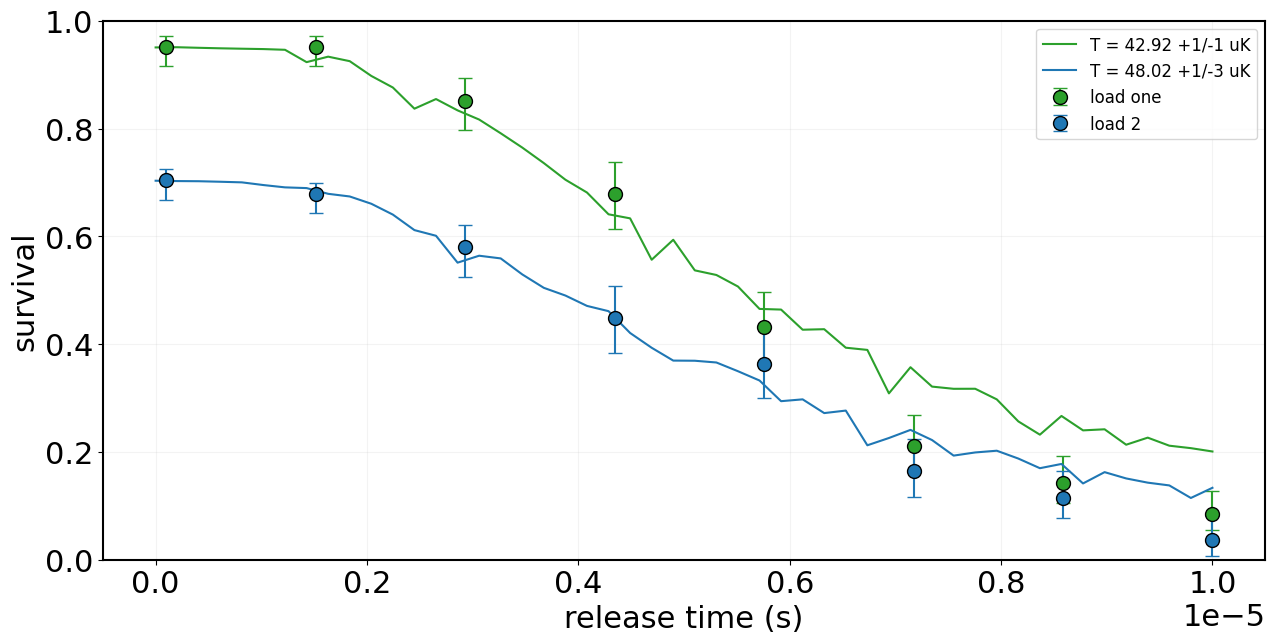

In [212]:
color1 = 'tab:green'
color2= 'tab:blue'
fileId1 = 30
fileId2 = fileId1 
threshold = 65
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
# x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(fileId2, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 30e-6
temp_guess2 = 30e-6
trap_depth = .5e-3
# load_two_y1[0]=.6
# load_two_y1[1]=.6

# load_two_y1[0]=.75
# load_one_y1[5]=.4

# load_one_y1[3]=.4
# load_one_y1[4]=.2
# load_one_y2[0]=.95
# load_one_y2[1]=.85
fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize,label = 'load one')

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1)

ax.errorbar(x_data1*1e-3,load_two_y1, yerr=load_two_err1,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'load 2')

ah.releaseRecaptureTemp(x_data1,load_two_y1,load_two_err1,tempGuess=temp_guess2,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

## V=1.68

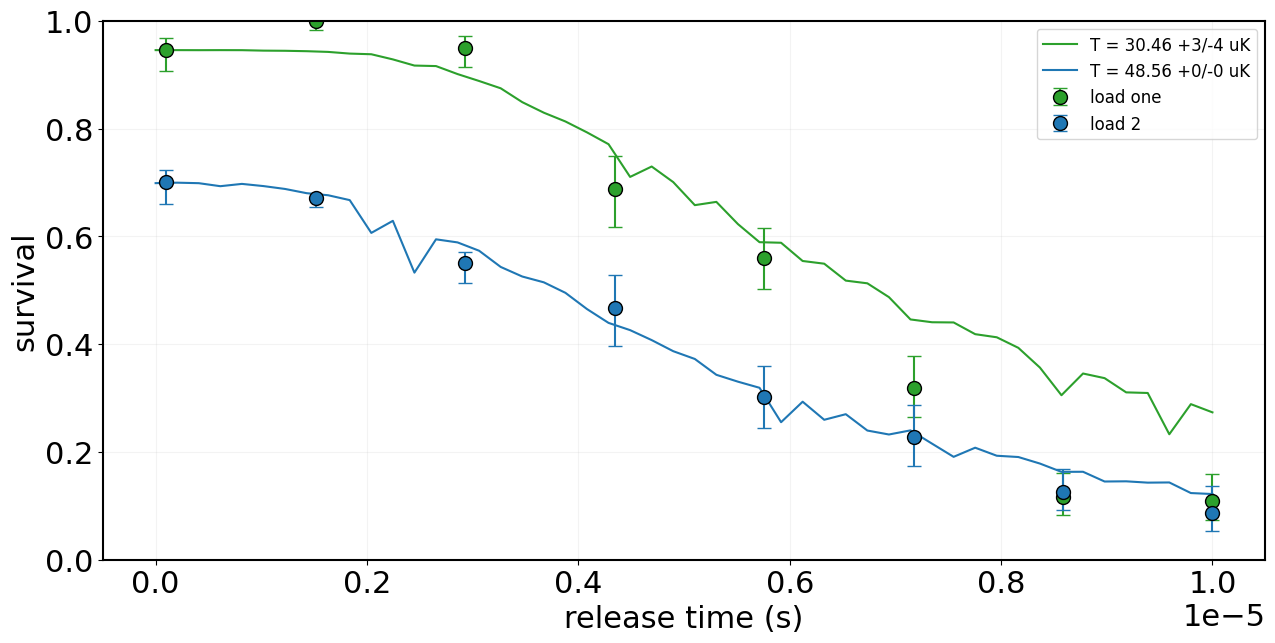

In [248]:
color1 = 'tab:green'
color2= 'tab:blue'
fileId1 = 31
fileId2 = fileId1 
threshold = 75
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
# x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(fileId2, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 30e-6
temp_guess2 = 30e-6
trap_depth = .5e-3
load_two_y1[0]=.7
load_two_y1[2]=.55
# load_two_y1[3]=.4

# load_two_y1[0]=.75
# load_one_y1[5]=.4

# load_one_y1[3]=.4
# load_one_y1[4]=.2
# load_one_y2[0]=.95
# load_one_y2[1]=.85
fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize,label = 'load one')

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1)

ax.errorbar(x_data1*1e-3,load_two_y1, yerr=load_two_err1,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'load 2')

ah.releaseRecaptureTemp(x_data1,load_two_y1,load_two_err1,tempGuess=temp_guess2,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color2)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

# V=1.74

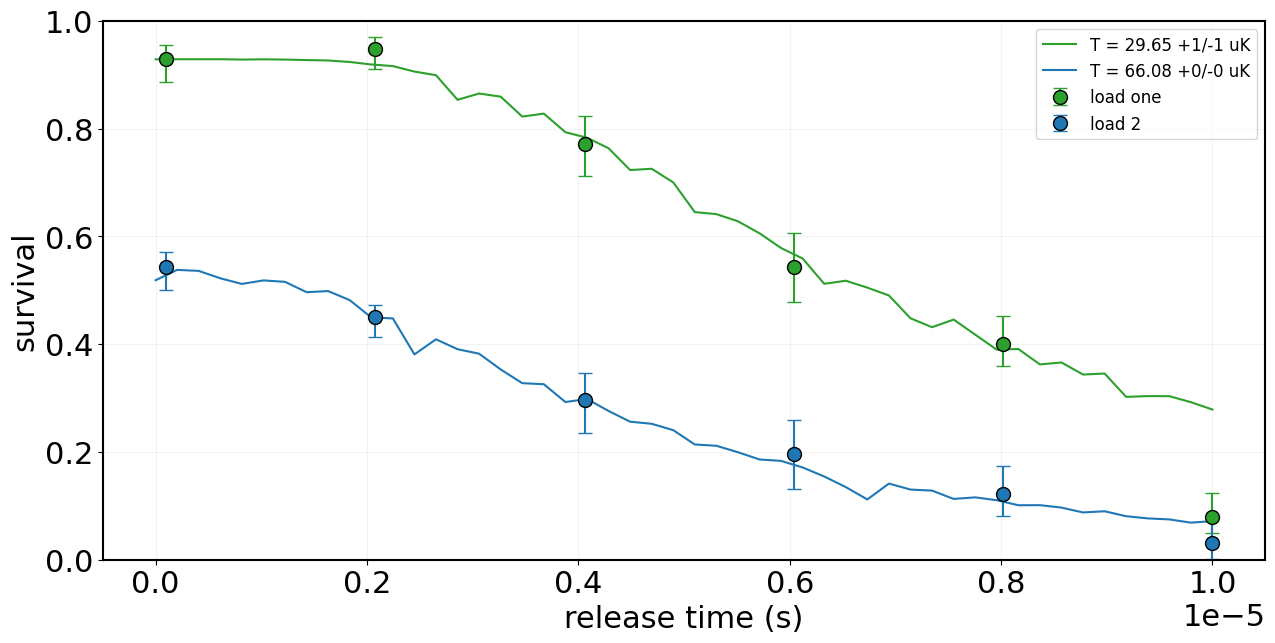

In [255]:
color1 = 'tab:green'
color2= 'tab:blue'
fileId1 = 35
fileId2 = fileId1 
threshold = 75
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
# x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(fileId2, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 30e-6
temp_guess2 = 30e-6
# trap_depth = .5e-3
# load_two_y1[0]=.8
load_two_y1[1]=.45

# load_two_y1[0]=.75
# load_one_y1[5]=.4

load_one_y1[4]=.4
# load_one_y1[4]=.2
# load_one_y2[0]=.95
# load_one_y2[1]=.85
fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize,label = 'load one')

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.1e-6),color=color1,last_index=5)

ax.errorbar(x_data1*1e-3,load_two_y1, yerr=load_two_err1,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'load 2')

ah.releaseRecaptureTemp(x_data1,load_two_y1,load_two_err1,tempGuess=temp_guess2,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.1e-6),color=color2)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

# V=1.85

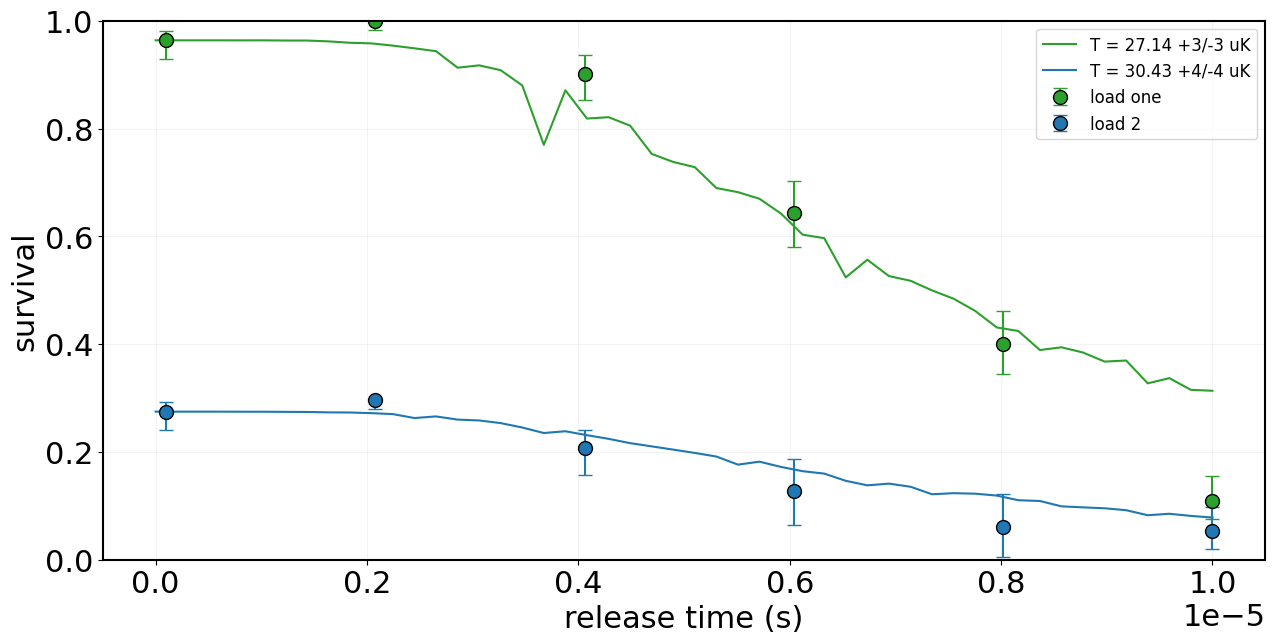

In [260]:
color1 = 'tab:green'
color2= 'tab:blue'
fileId1 = 38
fileId2 = fileId1 
threshold = 75
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
# x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(fileId2, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 30e-6
temp_guess2 = 30e-6
trap_depth = .5e-3
# load_two_y1[0]=.4
# load_two_y1[1]=.35

# load_two_y1[0]=.75
# load_one_y1[5]=.4

load_one_y1[4]=.4
# load_one_y1[4]=.2
# load_one_y2[0]=.95
# load_one_y2[1]=.85
fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize,label = 'load one')

ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.1e-6),color=color1)

ax.errorbar(x_data1*1e-3,load_two_y1, yerr=load_two_err1,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'load 2')

ah.releaseRecaptureTemp(x_data1,load_two_y1,load_two_err1,tempGuess=temp_guess2,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.1e-6),color=color2)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5

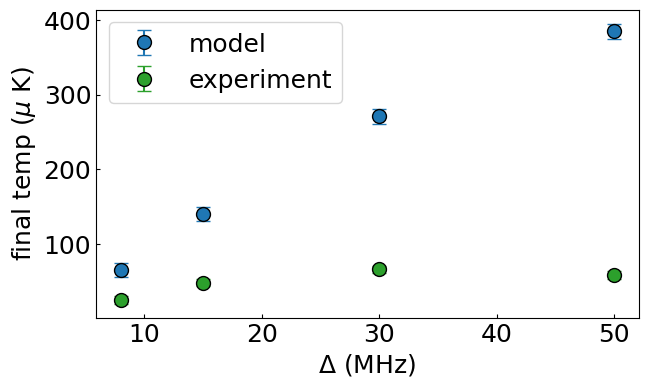

In [32]:
detuning = [8,15,30,50]
T_final_sim = [65, 140, 271, 385]
error_sim = [10,10,10,10]

error = [5,5,5,5]
T_final = [25, 48, 66, 58]


fig,ax = plt.subplots(figsize=(7,4))
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)
# ax[1].plot(dist, test_count,label = 'no LZ')
ax.xaxis.set_minor_locator(plt.NullLocator())
ax.yaxis.set_minor_locator(plt.NullLocator())
ax.grid(False)
ax.tick_params(axis='both', which='both', top=False, right=False, length=3)


ax.errorbar(detuning,T_final_sim, yerr=error_sim,ls='none',ecolor=color2,marker = 'o',
            markersize = markersize,markerfacecolor=color2,markeredgecolor='k',capsize=capsize,label = 'model')


ax.errorbar(detuning,T_final, yerr=error,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize,label = 'experiment')


ax.set_ylabel(r'final temp ($\mu$ K)')
ax.set_xlabel(r'$\Delta$ (MHz)')
# ax.set_title(r'2-1 collisions on D2 F=2-3 U=10 MHz', fontsize=15)
ax.legend(loc=2)
# ax.set_yscale('log')
plt.savefig("21_temps.png", dpi=500,  bbox_inches='tight', pad_inches=0)
